In [1]:
import torch
from torch.utils.data import Dataset
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools 
import random
import numpy as np
import matplotlib.lines as mlines
import pickle
import io
from stabs import*



class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)
def load_file(f):
    with open(f, "rb") as rb:
        pickle.load(rb)
        #return pickle.load(rb)
        return CPU_Unpickler(rb).load()
def remove_module_state(state):
    # original saved file with DataParallel
    # create new OrderedDict that does not contain `module.`
    from collections import OrderedDict
    new_state = OrderedDict()
    for k, v in state.items():
        #print(k)
        name = k[7:] # remove `module.`
        new_state[name] = v
        #print(name)
    return new_state




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


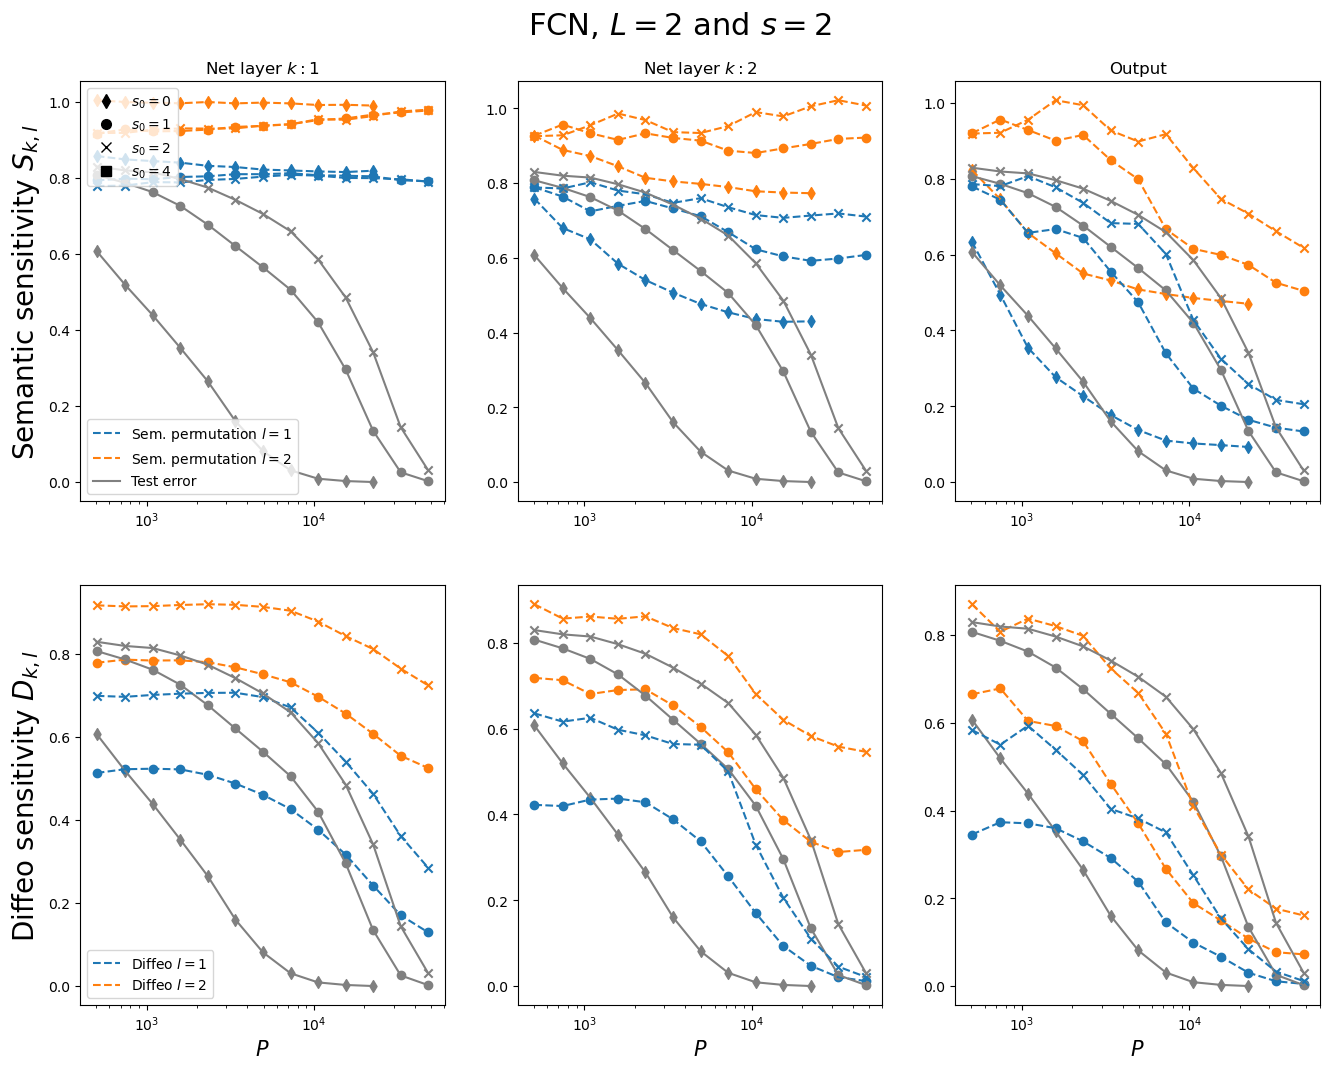

In [5]:
n=8

L=2
s=2
bs = 20
s0s = [0,1,2]#,2,4,6


colors = ['C'+str(gg) for gg in range(0,L)]#cm.rainbow(np.linspace(0, 1, L))

fig, axs = plt.subplots(2,(L+1), figsize = (16,12))
fig.suptitle(r"FCN, $L=%d$ and $s=2$" %L,fontsize =22,y=.94)
m = n**(s-1)
for idx_s0 in range(len(s0s)):
    s0 = s0s[idx_s0]
    
    
    if s0>0:
        mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_fcn2.pt'%(L,n,m,s0,s,bs))
    mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_fcn2.pt'%(L,n,m,s0,s,bs))
    mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_fcn2.pt'%(L,n,m,s0,s,bs))
    xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_fcn2.pt'%(L,n,m,s0,s,bs))

    xx = xx*n
    




    
    if idx_s0==0:
        mar = "d"
    elif idx_s0==1:
        mar = "o"
    elif idx_s0==2:
        mar = "x"
    elif idx_s0==3:
        mar = "s"
    for k in range(L+1):
        
        for l in range(L):
            #print(mat_all[:,k,l])
            #print(s0s[idx_s0])
            #print(xx)
            #print(mat_all_sem[idx_s0,:len(xx),k,l])
            if idx_s0==0:
                axs[0,k].plot(xx, mat_all_sem[:len(xx),k,l], color = colors[l],label =r"Sem. permutation $l=%d$" %(l+1),ls='--') 
                #axs[1,k].plot(xx, mat_all_pos[:len(xx),k,l], color = colors[l],label =r"Diffeo $l=%d$" %(l+1),ls='--') 
            else: 
                axs[0,k].plot(xx, mat_all_sem[:len(xx),k,l], color = colors[l],ls='--') 
                if idx_s0==1:
                    axs[1,k].plot(xx, mat_all_pos[:len(xx),k,l], color = colors[l],label =r"Diffeo $l=%d$" %(l+1),ls='--') 
                else:
                    axs[1,k].plot(xx, mat_all_pos[:len(xx),k,l], color = colors[l],ls='--') 
            if s0==0:
                axs[0,k].scatter(xx, mat_all_sem[:len(xx),k,l] ,marker = mar ,color = colors[l]) 
            else:
                axs[0,k].scatter(xx, mat_all_sem[:len(xx),k,l] ,marker = mar ,color = colors[l]) 
                axs[1,k].scatter(xx, mat_all_pos[:len(xx),k,l] ,marker = mar ,color = colors[l]) 
            #axs[k].plot(xx, mat_norms[:,k,l], color = 'black',label ="norm l=%d" %(l+1)) 
        if k==0 and idx_s0==0:
            axs[0,k].plot(xx, mat_terr[:len(xx)], color = 'grey',label ="Test error" ) 
            axs[1,k].plot(xx, mat_terr[:len(xx)], color = 'grey')
        else:
            axs[0,k].plot(xx, mat_terr[:len(xx)], color = 'grey') 
            axs[1,k].plot(xx, mat_terr[:len(xx)], color = 'grey') 
        axs[0,k].scatter(xx, mat_terr[:len(xx)], color = 'grey', marker = mar)
        axs[1,k].scatter(xx, mat_terr[:len(xx)], color = 'grey', marker = mar)
        
        axs[0,k].set_xscale("log")
        axs[1,k].set_xscale("log")
        axs[1,k].set_xlabel("$P$",size = 15)
        #axs[k].set_ylim(0,1)
        if k==0: 
            axs[0,0].set_ylabel(r"Semantic sensitivity $S_{k,l}$",size = 20)
            axs[0,0].legend()
            axs[1,0].set_ylabel(r"Diffeo sensitivity $D_{k,l}$",size = 20)
            axs[1,0].legend()
        if k<(L):
            axs[0,k].set_title(r"Net layer $k: %d$" %(k+1))
        else:
            axs[0,L].set_title("Output")
            
s01 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
s02 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s03 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s04 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
first_legend = axs[0,0].legend()
ax = axs[0,0].add_artist(first_legend)
axs[0,0].legend(handles=[s01,s02,s03,s04],loc = 'upper left')  


plt.savefig("figures/sens_fcn2_L_%d_s_%d.png" %(L,s), bbox_inches='tight')
plt.savefig("figures/sens_fcn2_L_%d_s_%d.pdf" %(L,s), bbox_inches='tight')

n=8, L=2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


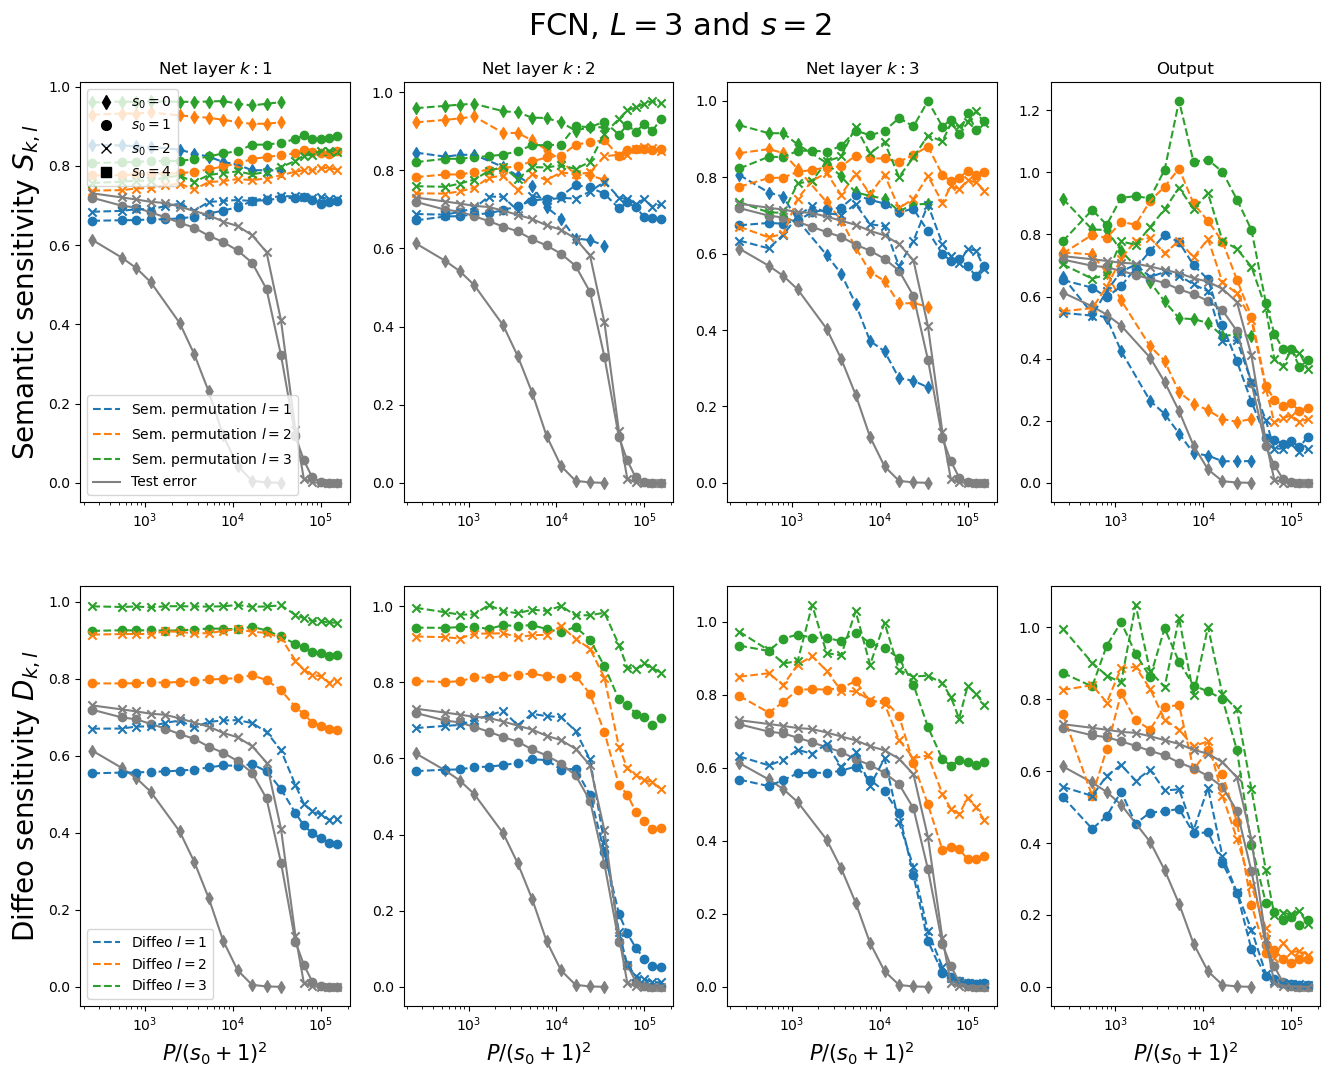

In [7]:
n=4

L=3
s=2
bs = 20
s0s = [0,1,2]#,2,4,6


colors = ['C'+str(gg) for gg in range(0,L)]#cm.rainbow(np.linspace(0, 1, L))

fig, axs = plt.subplots(2,(L+1), figsize = (16,12))
fig.suptitle(r"FCN, $L=%d$ and $s=2$" %L,fontsize =22,y=.94)
m = n**(s-1)
for idx_s0 in range(len(s0s)):
    s0 = s0s[idx_s0]
    
    
    if s0>0:
        mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_fcn2.pt'%(L,n,m,s0,s,bs))
    mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_fcn2.pt'%(L,n,m,s0,s,bs))
    mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_fcn2.pt'%(L,n,m,s0,s,bs))
    xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_fcn2.pt'%(L,n,m,s0,s,bs))

    xx = xx*n
    




    
    if idx_s0==0:
        mar = "d"
    elif idx_s0==1:
        mar = "o"
    elif idx_s0==2:
        mar = "x"
    elif idx_s0==3:
        mar = "s"
    for k in range(L+1):
        
        for l in range(L):
            #print(mat_all[:,k,l])
            #print(s0s[idx_s0])
            #print(xx)
            #print(mat_all_sem[idx_s0,:len(xx),k,l])
            if idx_s0==0:
                axs[0,k].plot(xx, mat_all_sem[:len(xx),k,l], color = colors[l],label =r"Sem. permutation $l=%d$" %(l+1),ls='--') 
                #axs[1,k].plot(xx, mat_all_pos[:len(xx),k,l], color = colors[l],label =r"Diffeo $l=%d$" %(l+1),ls='--') 
            else: 
                axs[0,k].plot(xx, mat_all_sem[:len(xx),k,l], color = colors[l],ls='--') 
                if idx_s0==1:
                    axs[1,k].plot(xx, mat_all_pos[:len(xx),k,l], color = colors[l],label =r"Diffeo $l=%d$" %(l+1),ls='--') 
                else:
                    axs[1,k].plot(xx, mat_all_pos[:len(xx),k,l], color = colors[l],ls='--') 
            if s0==0:
                axs[0,k].scatter(xx, mat_all_sem[:len(xx),k,l] ,marker = mar ,color = colors[l]) 
            else:
                axs[0,k].scatter(xx, mat_all_sem[:len(xx),k,l] ,marker = mar ,color = colors[l]) 
                axs[1,k].scatter(xx, mat_all_pos[:len(xx),k,l] ,marker = mar ,color = colors[l]) 
            #axs[k].plot(xx, mat_norms[:,k,l], color = 'black',label ="norm l=%d" %(l+1)) 
        if k==0 and idx_s0==0:
            axs[0,k].plot(xx, mat_terr[:len(xx)], color = 'grey',label ="Test error" ) 
            axs[1,k].plot(xx, mat_terr[:len(xx)], color = 'grey')
        else:
            axs[0,k].plot(xx, mat_terr[:len(xx)], color = 'grey') 
            axs[1,k].plot(xx, mat_terr[:len(xx)], color = 'grey') 
        axs[0,k].scatter(xx, mat_terr[:len(xx)], color = 'grey', marker = mar)
        axs[1,k].scatter(xx, mat_terr[:len(xx)], color = 'grey', marker = mar)
        
        axs[0,k].set_xscale("log")
        axs[1,k].set_xscale("log")
        axs[1,k].set_xlabel("$P/(s_0+1)^2$",size = 15)
        #axs[k].set_ylim(0,1)
        if k==0: 
            axs[0,0].set_ylabel(r"Semantic sensitivity $S_{k,l}$",size = 20)
            axs[0,0].legend()
            axs[1,0].set_ylabel(r"Diffeo sensitivity $D_{k,l}$",size = 20)
            axs[1,0].legend()
        if k<(L):
            axs[0,k].set_title(r"Net layer $k: %d$" %(k+1))
        else:
            axs[0,L].set_title("Output")
            
s01 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
s02 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s03 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s04 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
first_legend = axs[0,0].legend()
ax = axs[0,0].add_artist(first_legend)
axs[0,0].legend(handles=[s01,s02,s03,s04],loc = 'upper left')  


plt.savefig("figures/sens_fcn2_L_%d_s_%d.png" %(L,s), bbox_inches='tight')
plt.savefig("figures/sens_fcn2_L_%d_s_%d.pdf" %(L,s), bbox_inches='tight')

n=4, L=3



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


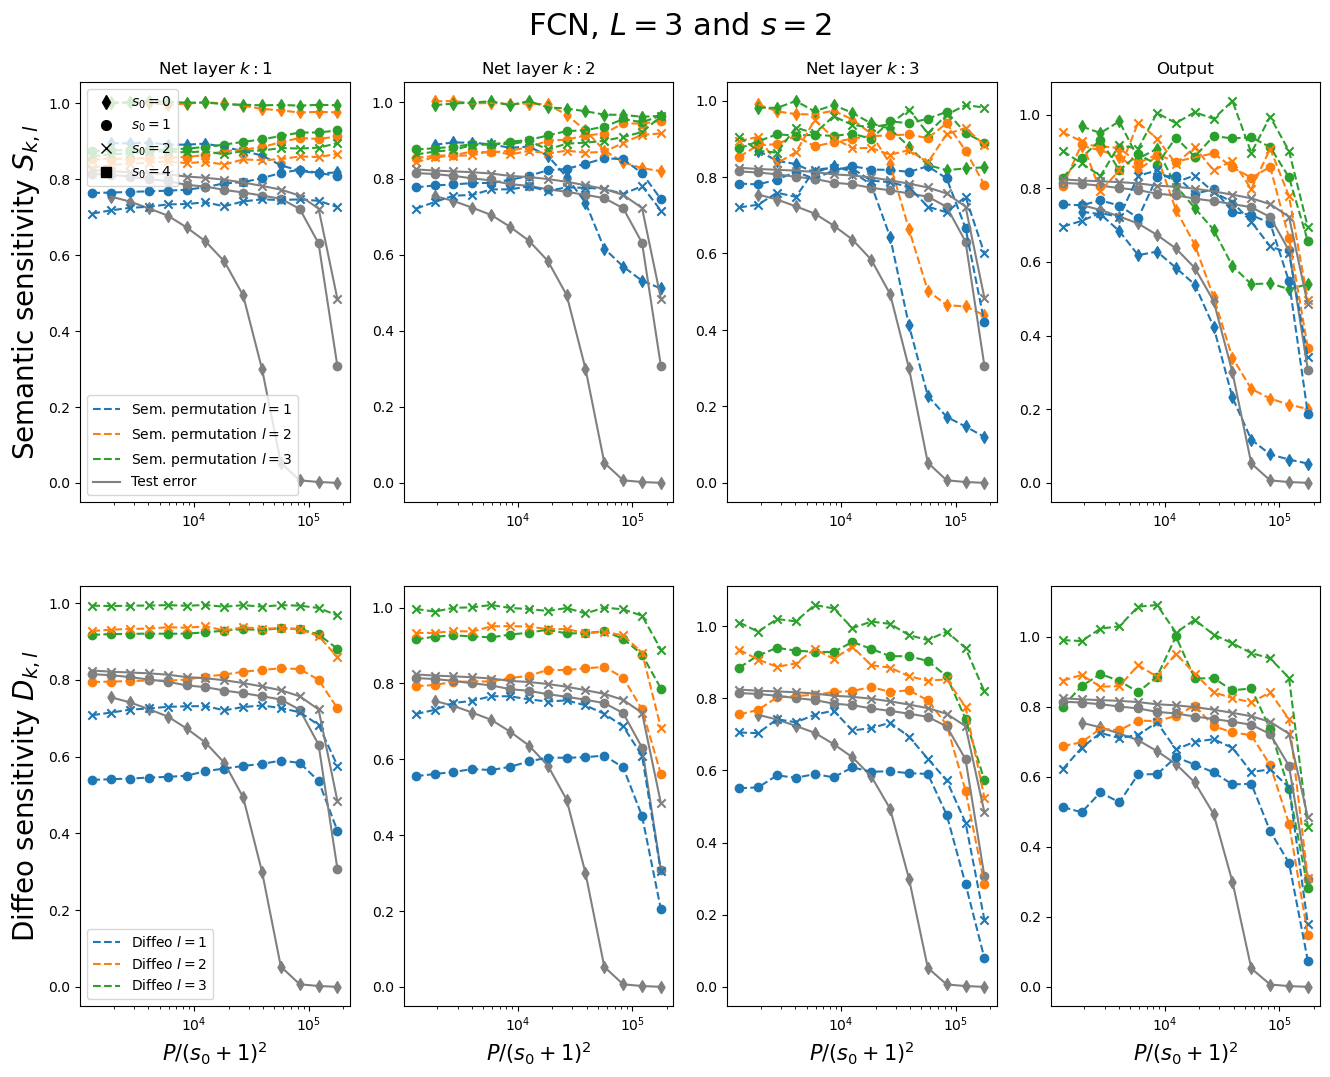

In [2]:
n=6

L=3
s=2
bs = 20
s0s = [0,1,2]#,2,4,6


colors = ['C'+str(gg) for gg in range(0,L)]#cm.rainbow(np.linspace(0, 1, L))

fig, axs = plt.subplots(2,(L+1), figsize = (16,12))
fig.suptitle(r"FCN, $L=%d$ and $s=2$" %L,fontsize =22,y=.94)
m = n**(s-1)
for idx_s0 in range(len(s0s)):
    s0 = s0s[idx_s0]
    
    
    if s0>0:
        mat_all_pos = torch.load('mats/mat_pos_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_fcn2.pt'%(L,n,m,s0,s,bs))
    mat_all_sem = torch.load('mats/mat_sem_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_fcn2.pt'%(L,n,m,s0,s,bs))
    mat_terr = torch.load('mats/mat_terr_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_fcn2.pt'%(L,n,m,s0,s,bs))
    xx = torch.load('mats/xx_L_%d_n_%d_m_%d_s0_%d_s_%d_bs_%d_fcn2.pt'%(L,n,m,s0,s,bs))

    xx = xx*n
    




    
    if idx_s0==0:
        mar = "d"
    elif idx_s0==1:
        mar = "o"
    elif idx_s0==2:
        mar = "x"
    elif idx_s0==3:
        mar = "s"
    for k in range(L+1):
        
        for l in range(L):
            #print(mat_all[:,k,l])
            #print(s0s[idx_s0])
            #print(xx)
            #print(mat_all_sem[idx_s0,:len(xx),k,l])
            if idx_s0==0:
                axs[0,k].plot(xx, mat_all_sem[:len(xx),k,l], color = colors[l],label =r"Sem. permutation $l=%d$" %(l+1),ls='--') 
                #axs[1,k].plot(xx, mat_all_pos[:len(xx),k,l], color = colors[l],label =r"Diffeo $l=%d$" %(l+1),ls='--') 
            else: 
                axs[0,k].plot(xx, mat_all_sem[:len(xx),k,l], color = colors[l],ls='--') 
                if idx_s0==1:
                    axs[1,k].plot(xx, mat_all_pos[:len(xx),k,l], color = colors[l],label =r"Diffeo $l=%d$" %(l+1),ls='--') 
                else:
                    axs[1,k].plot(xx, mat_all_pos[:len(xx),k,l], color = colors[l],ls='--') 
            if s0==0:
                axs[0,k].scatter(xx, mat_all_sem[:len(xx),k,l] ,marker = mar ,color = colors[l]) 
            else:
                axs[0,k].scatter(xx, mat_all_sem[:len(xx),k,l] ,marker = mar ,color = colors[l]) 
                axs[1,k].scatter(xx, mat_all_pos[:len(xx),k,l] ,marker = mar ,color = colors[l]) 
            #axs[k].plot(xx, mat_norms[:,k,l], color = 'black',label ="norm l=%d" %(l+1)) 
        if k==0 and idx_s0==0:
            axs[0,k].plot(xx, mat_terr[:len(xx)], color = 'grey',label ="Test error" ) 
            axs[1,k].plot(xx, mat_terr[:len(xx)], color = 'grey')
        else:
            axs[0,k].plot(xx, mat_terr[:len(xx)], color = 'grey') 
            axs[1,k].plot(xx, mat_terr[:len(xx)], color = 'grey') 
        axs[0,k].scatter(xx, mat_terr[:len(xx)], color = 'grey', marker = mar)
        axs[1,k].scatter(xx, mat_terr[:len(xx)], color = 'grey', marker = mar)
        
        axs[0,k].set_xscale("log")
        axs[1,k].set_xscale("log")
        axs[1,k].set_xlabel("$P/(s_0+1)^2$",size = 15)
        #axs[k].set_ylim(0,1)
        if k==0: 
            axs[0,0].set_ylabel(r"Semantic sensitivity $S_{k,l}$",size = 20)
            axs[0,0].legend()
            axs[1,0].set_ylabel(r"Diffeo sensitivity $D_{k,l}$",size = 20)
            axs[1,0].legend()
        if k<(L):
            axs[0,k].set_title(r"Net layer $k: %d$" %(k+1))
        else:
            axs[0,L].set_title("Output")
            
s01 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
s02 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s03 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s04 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
first_legend = axs[0,0].legend()
ax = axs[0,0].add_artist(first_legend)
axs[0,0].legend(handles=[s01,s02,s03,s04],loc = 'upper left')  


plt.savefig("figures/sens_fcn2_L_%d_s_%d.png" %(L,s), bbox_inches='tight')
plt.savefig("figures/sens_fcn2_L_%d_s_%d.pdf" %(L,s), bbox_inches='tight')